In [2]:
import numpy as np
import pandas as pd
import copy
import math
import matplotlib.pyplot as plt

In [3]:
from optimizer import compute_gradient,  gradient_descent
from cost import compute_cost, mean_squared_error

In [4]:
# Loading the dataset
dataframe = pd.read_csv(r"C:\Users\anura\Downloads\archive (8)\student_scores.csv")
dataframe.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
x_train = np.array(dataframe['Hours'])
y_train = np.array(dataframe['Scores'])

In [6]:
print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)

x_train shape :  (25,)
y_train shape :  (25,)


In [7]:
# Randomly initializing the weight and setting bias to zero
initial_w = np.random.rand(1)
initial_b = 0.

# some gradient descent settings
iterations = 1500
learning_rate = 0.001

w,b,cost,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, learning_rate, iterations)

print("(w, b) found by gradient descent:", w, b)

Iteration    0: Cost  1355.67
Iteration  150: Cost    14.61
Iteration  300: Cost    14.52
Iteration  450: Cost    14.52
Iteration  600: Cost    14.52
Iteration  750: Cost    14.51
Iteration  900: Cost    14.51
Iteration 1050: Cost    14.50
Iteration 1200: Cost    14.50
Iteration 1350: Cost    14.50
(w, b) found by gradient descent: [9.89429417] [1.74960232]


In [17]:
np.savetxt("cost.txt", cost)

In [9]:
def save_parameters(w, b, filename='model_parameters.txt'):
    with open(filename, 'w') as file:
        file.write(f'w: {w}\n')
        file.write(f'b: {b}\n')


In [10]:
# Saving parameters for later use in deployment phase
save_parameters(w, b)

In [11]:
def predict(num):
    score = num * w + b
    return score[0]


In [12]:
num = float(input("Enter the score to predict the marks : "))
score = predict(num)
print(f"The score for {num} hours is : {score}")

The score for 2.0 hours is : 21.538190657099094


In [13]:
m = x_train.shape[0]
predicted = np.zeros(m)

# Predicting the values of hours i.e., y_train using x_train
for i in range(m):
    predicted[i] = w * x_train[i] + b

C:\Users\anura\AppData\Local\Temp\ipykernel_27572\214329390.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted[i] = w * x_train[i] + b


In [14]:
# Calculating the Mean Squared Error

print(f"Mean squared Error : {mean_squared_error(y_train, predicted)}")

Mean squared Error : 28.988325252581845


Text(0.5, 0, 'Hours')

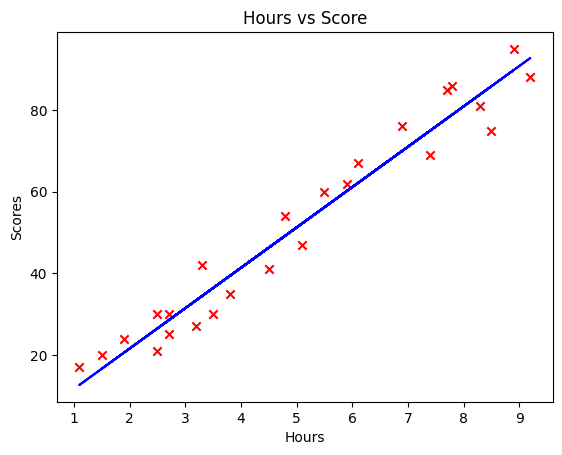

In [15]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Hours vs Score")
# Set the y-axis label
plt.ylabel('Scores')
# Set the x-axis label
plt.xlabel('Hours')

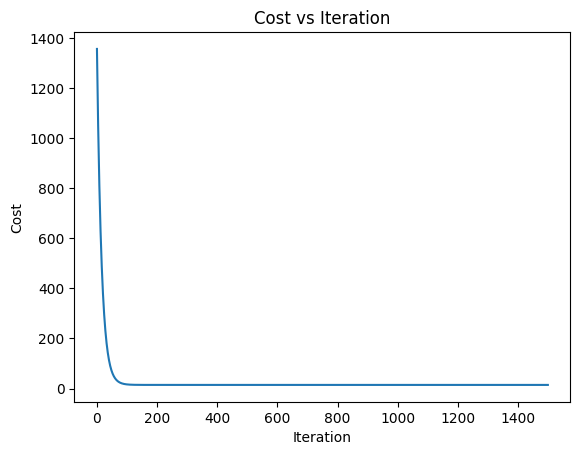

In [16]:
# Plotting cost vs iteration
plt.plot(range(iterations), cost)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.show()
